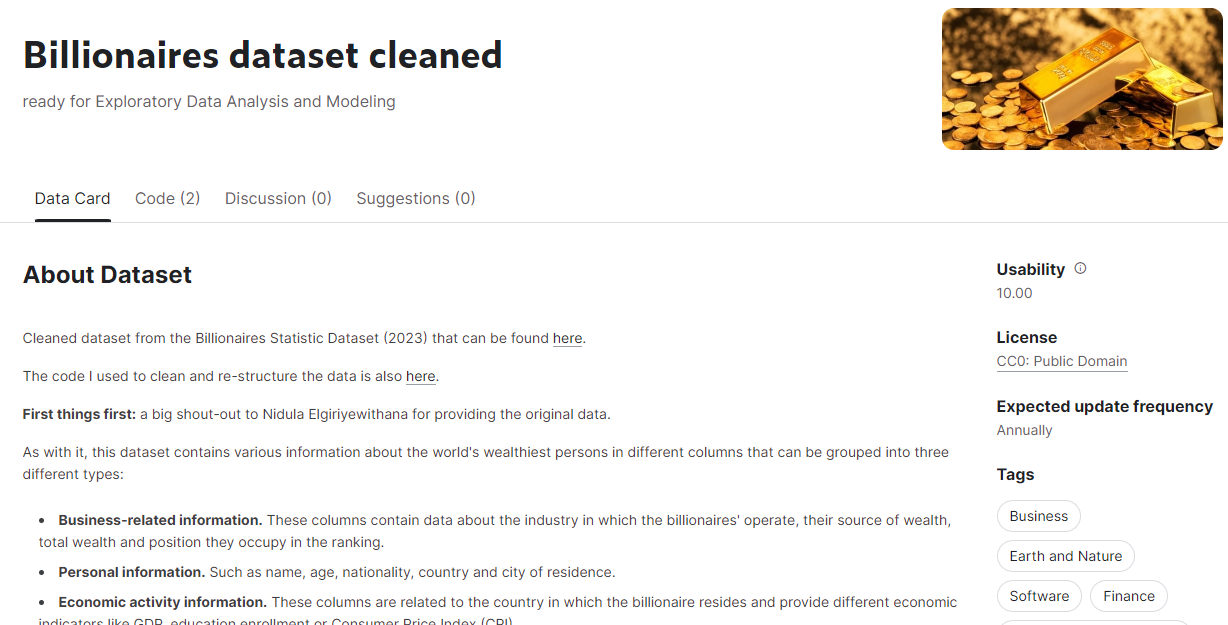

# Model Building of Billionaires Dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [2]:
billion=pd.read_csv('df_ready.csv')

In [3]:
billion

,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,...,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,...,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,2540,1000,Healthcare,Yu Rong,51,China,Shanghai,Health clinics,China,M,...,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
2587,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80,United States,Pottsville,Beer,United States,M,...,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America
2588,2540,1000,Manufacturing,Zhang Gongyun,60,China,Gaomi,Tyre manufacturing machinery,China,M,...,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia
2589,2540,1000,Real Estate,Zhang Guiping & family,71,China,Nanjing,Real estate,China,M,...,19910000000000,50.6,100.2,77.0,9.4,59.2,1397715000,35.861660,104.195397,Asia


In [4]:
billion.shape

(2591, 30)

In [5]:
billion.nunique()

position                 219
wealth                   219
industry                  18
full_name               2589
age                       77
country_of_residence      78
city_of_residence        741
source                   898
citizenship               76
gender                     2
birth_date              2045
last_name               1715
first_name              1740
residence_state           47
residence_region           7
birth_year                76
birth_month               12
birth_day                 31
cpi_country               64
cpi_change_country        45
gdp_country               78
g_tertiary_ed_enroll      68
g_primary_ed_enroll       65
life_expectancy           61
tax_revenue               59
tax_rate                  64
country_pop               78
country_lat               78
country_long              78
continent                  6
dtype: int64

In [6]:
billion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2591 entries, 0 to 2590
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              2591 non-null   int64  
 1   wealth                2591 non-null   int64  
 2   industry              2591 non-null   object 
 3   full_name             2591 non-null   object 
 4   age                   2591 non-null   int64  
 5   country_of_residence  2591 non-null   object 
 6   city_of_residence     2591 non-null   object 
 7   source                2591 non-null   object 
 8   citizenship           2591 non-null   object 
 9   gender                2591 non-null   object 
 10  birth_date            2591 non-null   object 
 11  last_name             2591 non-null   object 
 12  first_name            2591 non-null   object 
 13  residence_state       2591 non-null   object 
 14  residence_region      2591 non-null   object 
 15  birth_year           

In [7]:
billion.describe().T

,count,mean,std,min,25%,50%,75%,max
position,2591.0,1.282914e+03,7.401911e+02,1.000000e+00,6.360000e+02,1.272000e+03,1.905000e+03,2.540000e+03
wealth,2591.0,4.666191e+03,9.917104e+03,1.000000e+03,1.500000e+03,2.400000e+03,4.300000e+03,2.110000e+05
age,2591.0,6.525280e+01,1.305544e+01,1.800000e+01,5.600000e+01,6.500000e+01,7.500000e+01,1.010000e+02
birth_year,2591.0,1.957134e+03,1.307425e+01,1.921000e+03,1.948000e+03,1.957000e+03,1.966000e+03,2.004000e+03
birth_month,2591.0,5.646083e+00,3.732279e+00,1.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,1.200000e+01
birth_day,2591.0,1.188267e+01,9.941884e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.100000e+01,3.100000e+01
gdp_country,2591.0,1.102966e+13,9.641891e+12,1.044779e+09,1.394116e+12,5.081770e+12,2.142770e+13,2.142770e+13
g_tertiary_ed_enroll,2591.0,6.412574e+01,2.452781e+01,0.000000e+00,5.060000e+01,6.340000e+01,8.820000e+01,1.366000e+02
g_primary_ed_enroll,2591.0,1.002324e+02,1.196639e+01,0.000000e+00,1.002000e+02,1.018000e+02,1.026000e+02,1.421000e+02
life_expectancy,2591.0,7.840910e+01,3.910509e+00,5.430000e+01,7.700000e+01,7.850000e+01,8.130000e+01,8.594000e+01


In [8]:
billion['position'] = billion['position'].astype('float')
billion['wealth'] = billion['wealth'].astype('float')
billion['age'] = billion['age'].astype('float')
billion['birth_year'] = billion['birth_year'].astype('float')
billion['birth_month'] = billion['birth_month'].astype('float')
billion['birth_day'] = billion['birth_day'].astype('float')
billion['gdp_country'] = billion['gdp_country'].astype('float')
billion['country_pop'] = billion['country_pop'].astype('float')



In [9]:
billion.industry.value_counts()

Finance & Investments         364
Manufacturing                 316
Technology                    312
Fashion & Retail              261
Food & Beverage               207
Healthcare                    198
Real Estate                   191
Diversified                   187
Energy                        100
Media & Entertainment          87
Metals & Mining                72
Automotive                     69
Service                        53
Construction & Engineering     42
Sports                         39
Logistics                      38
Telecom                        30
Gambling & Casinos             25
Name: industry, dtype: int64

Text(0.5, 1.0, 'Industry vs Wealth Bar Grpah')

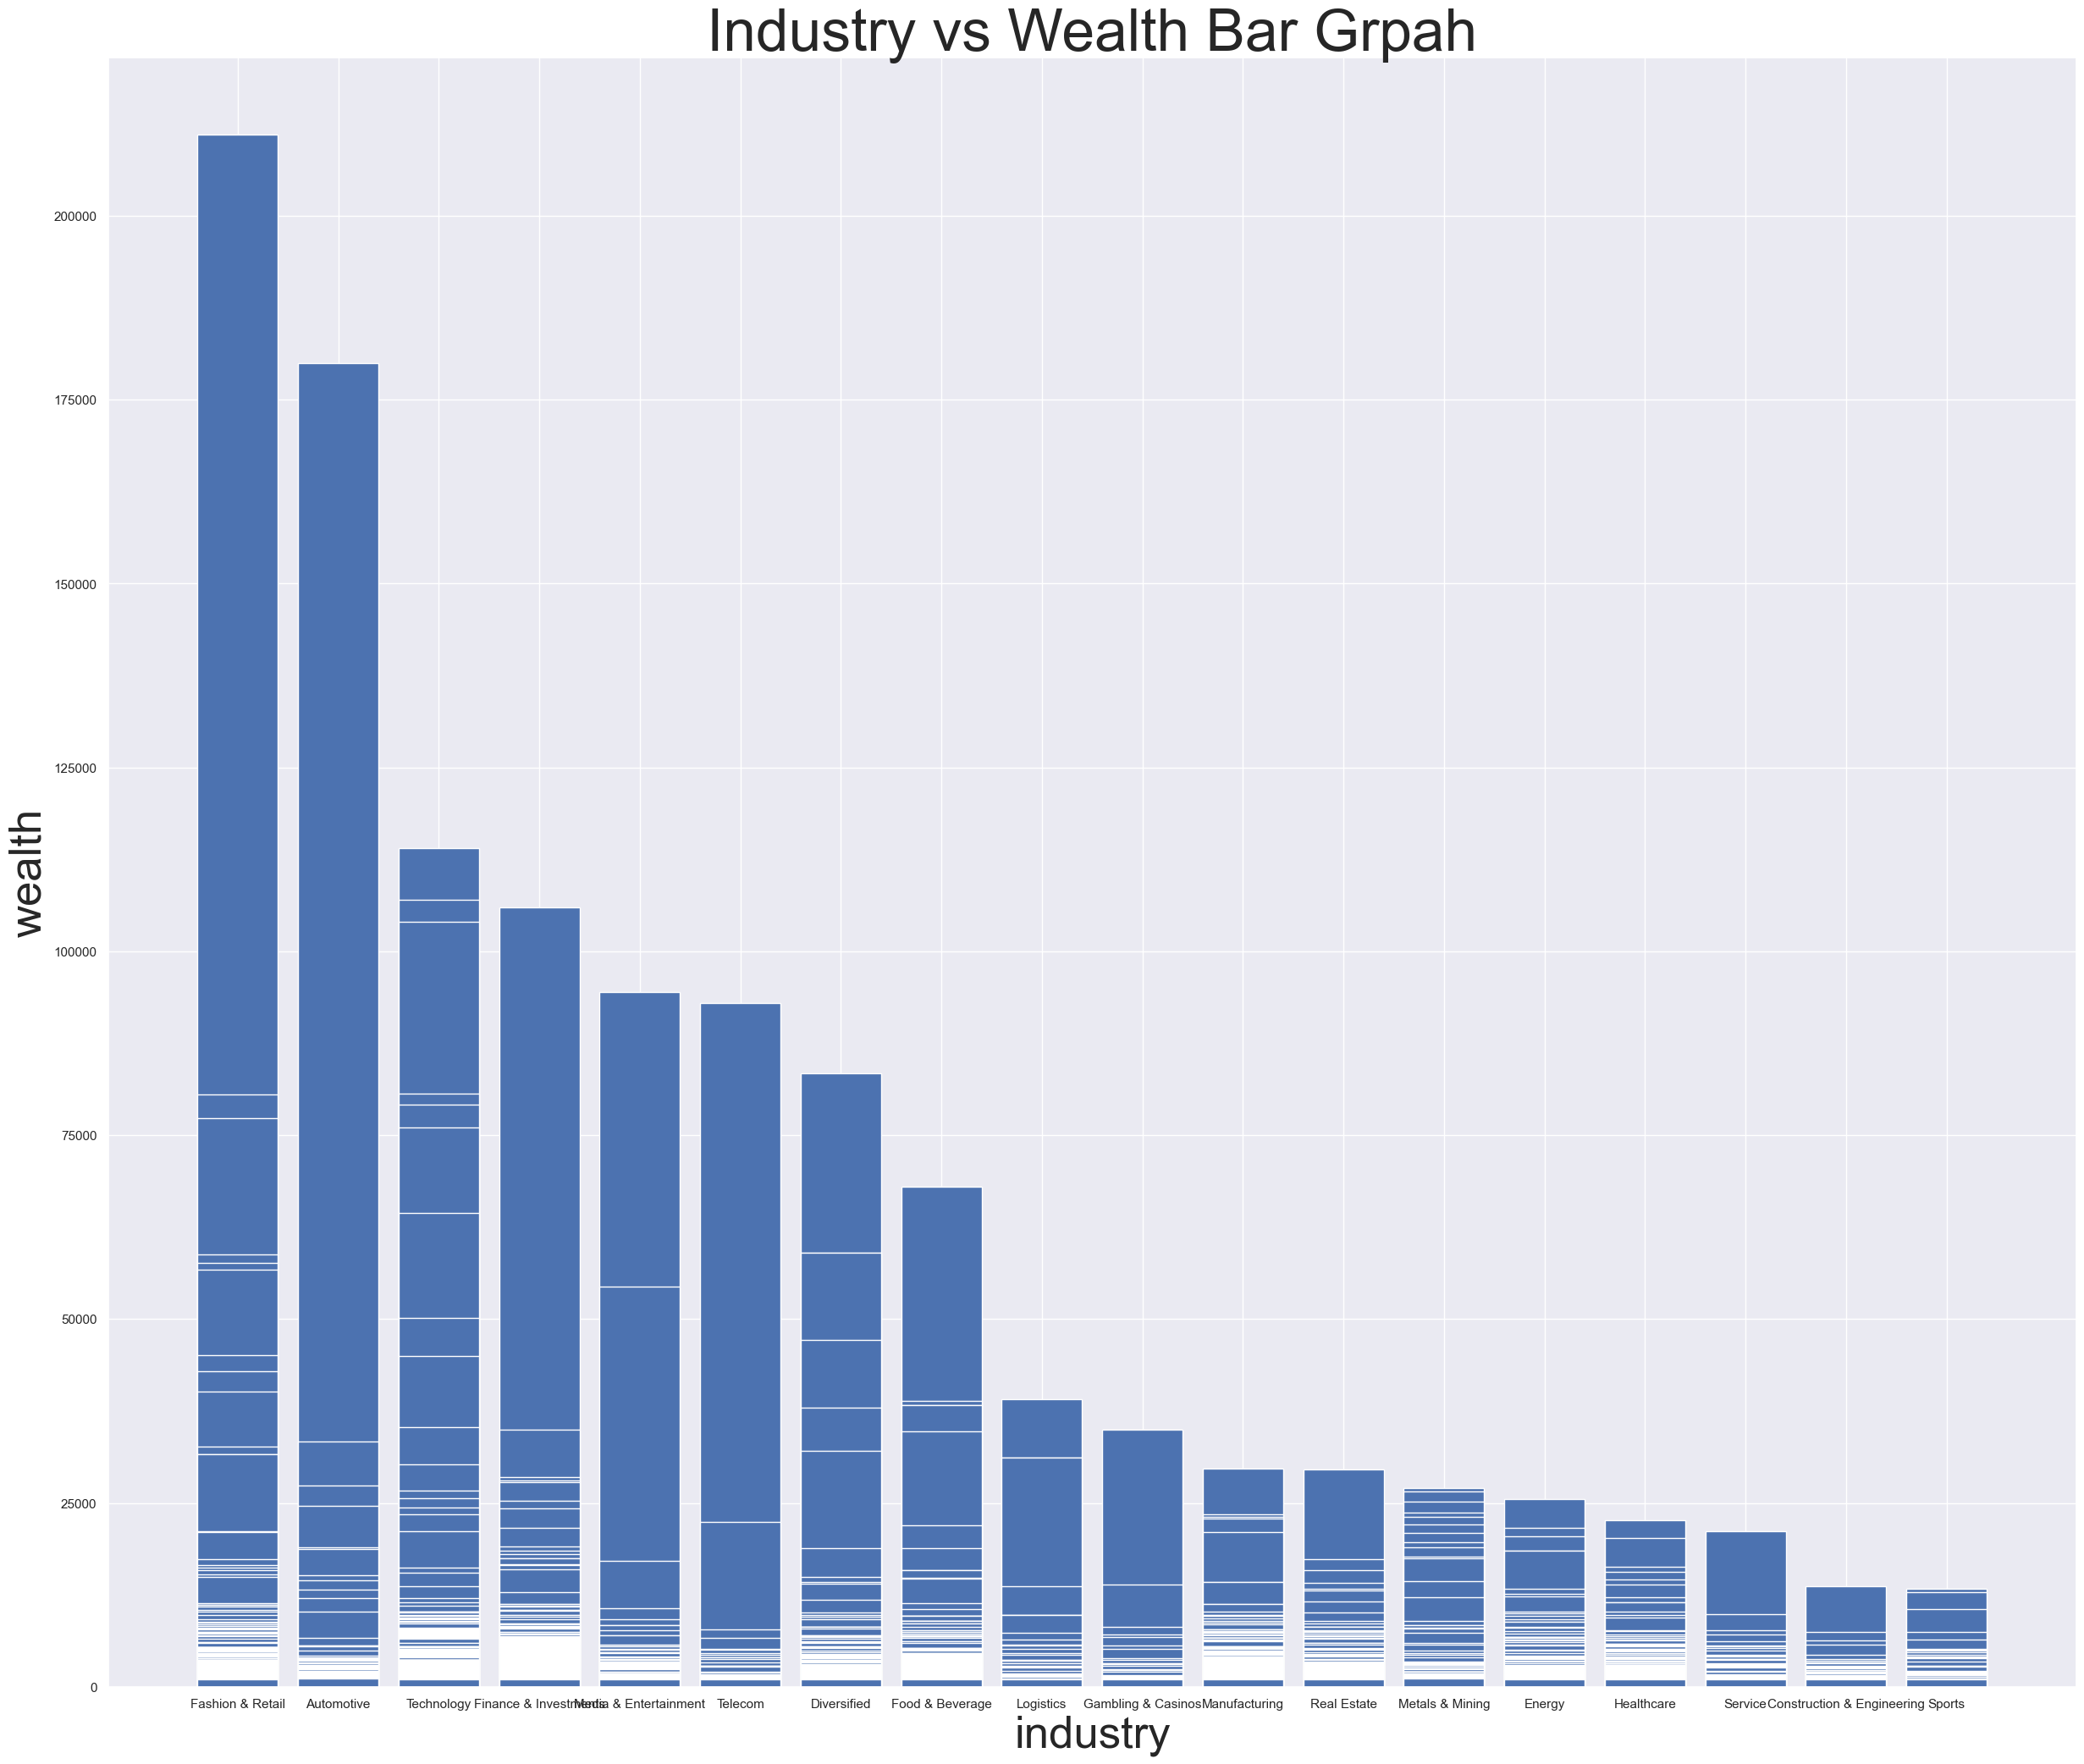

In [10]:
plt.figure(figsize=(30, 25))
plt.bar(billion['industry'],billion['wealth'])
plt.xlabel('industry',fontsize=38)
plt.ylabel('wealth',fontsize=38)
plt.title('Industry vs Wealth Bar Grpah',fontsize=50)


Fashion and Retails shows Maximum Wealth

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
billion['industry'] = label_encoder.fit_transform(billion['industry'])


In [12]:
billion.drop('full_name',axis=1,inplace=True)


In [13]:
billion['country_of_residence'] = label_encoder.fit_transform(billion['country_of_residence'])

Text(0.5, 1.0, 'country_of_residence vs Wealth Bar Grpah')

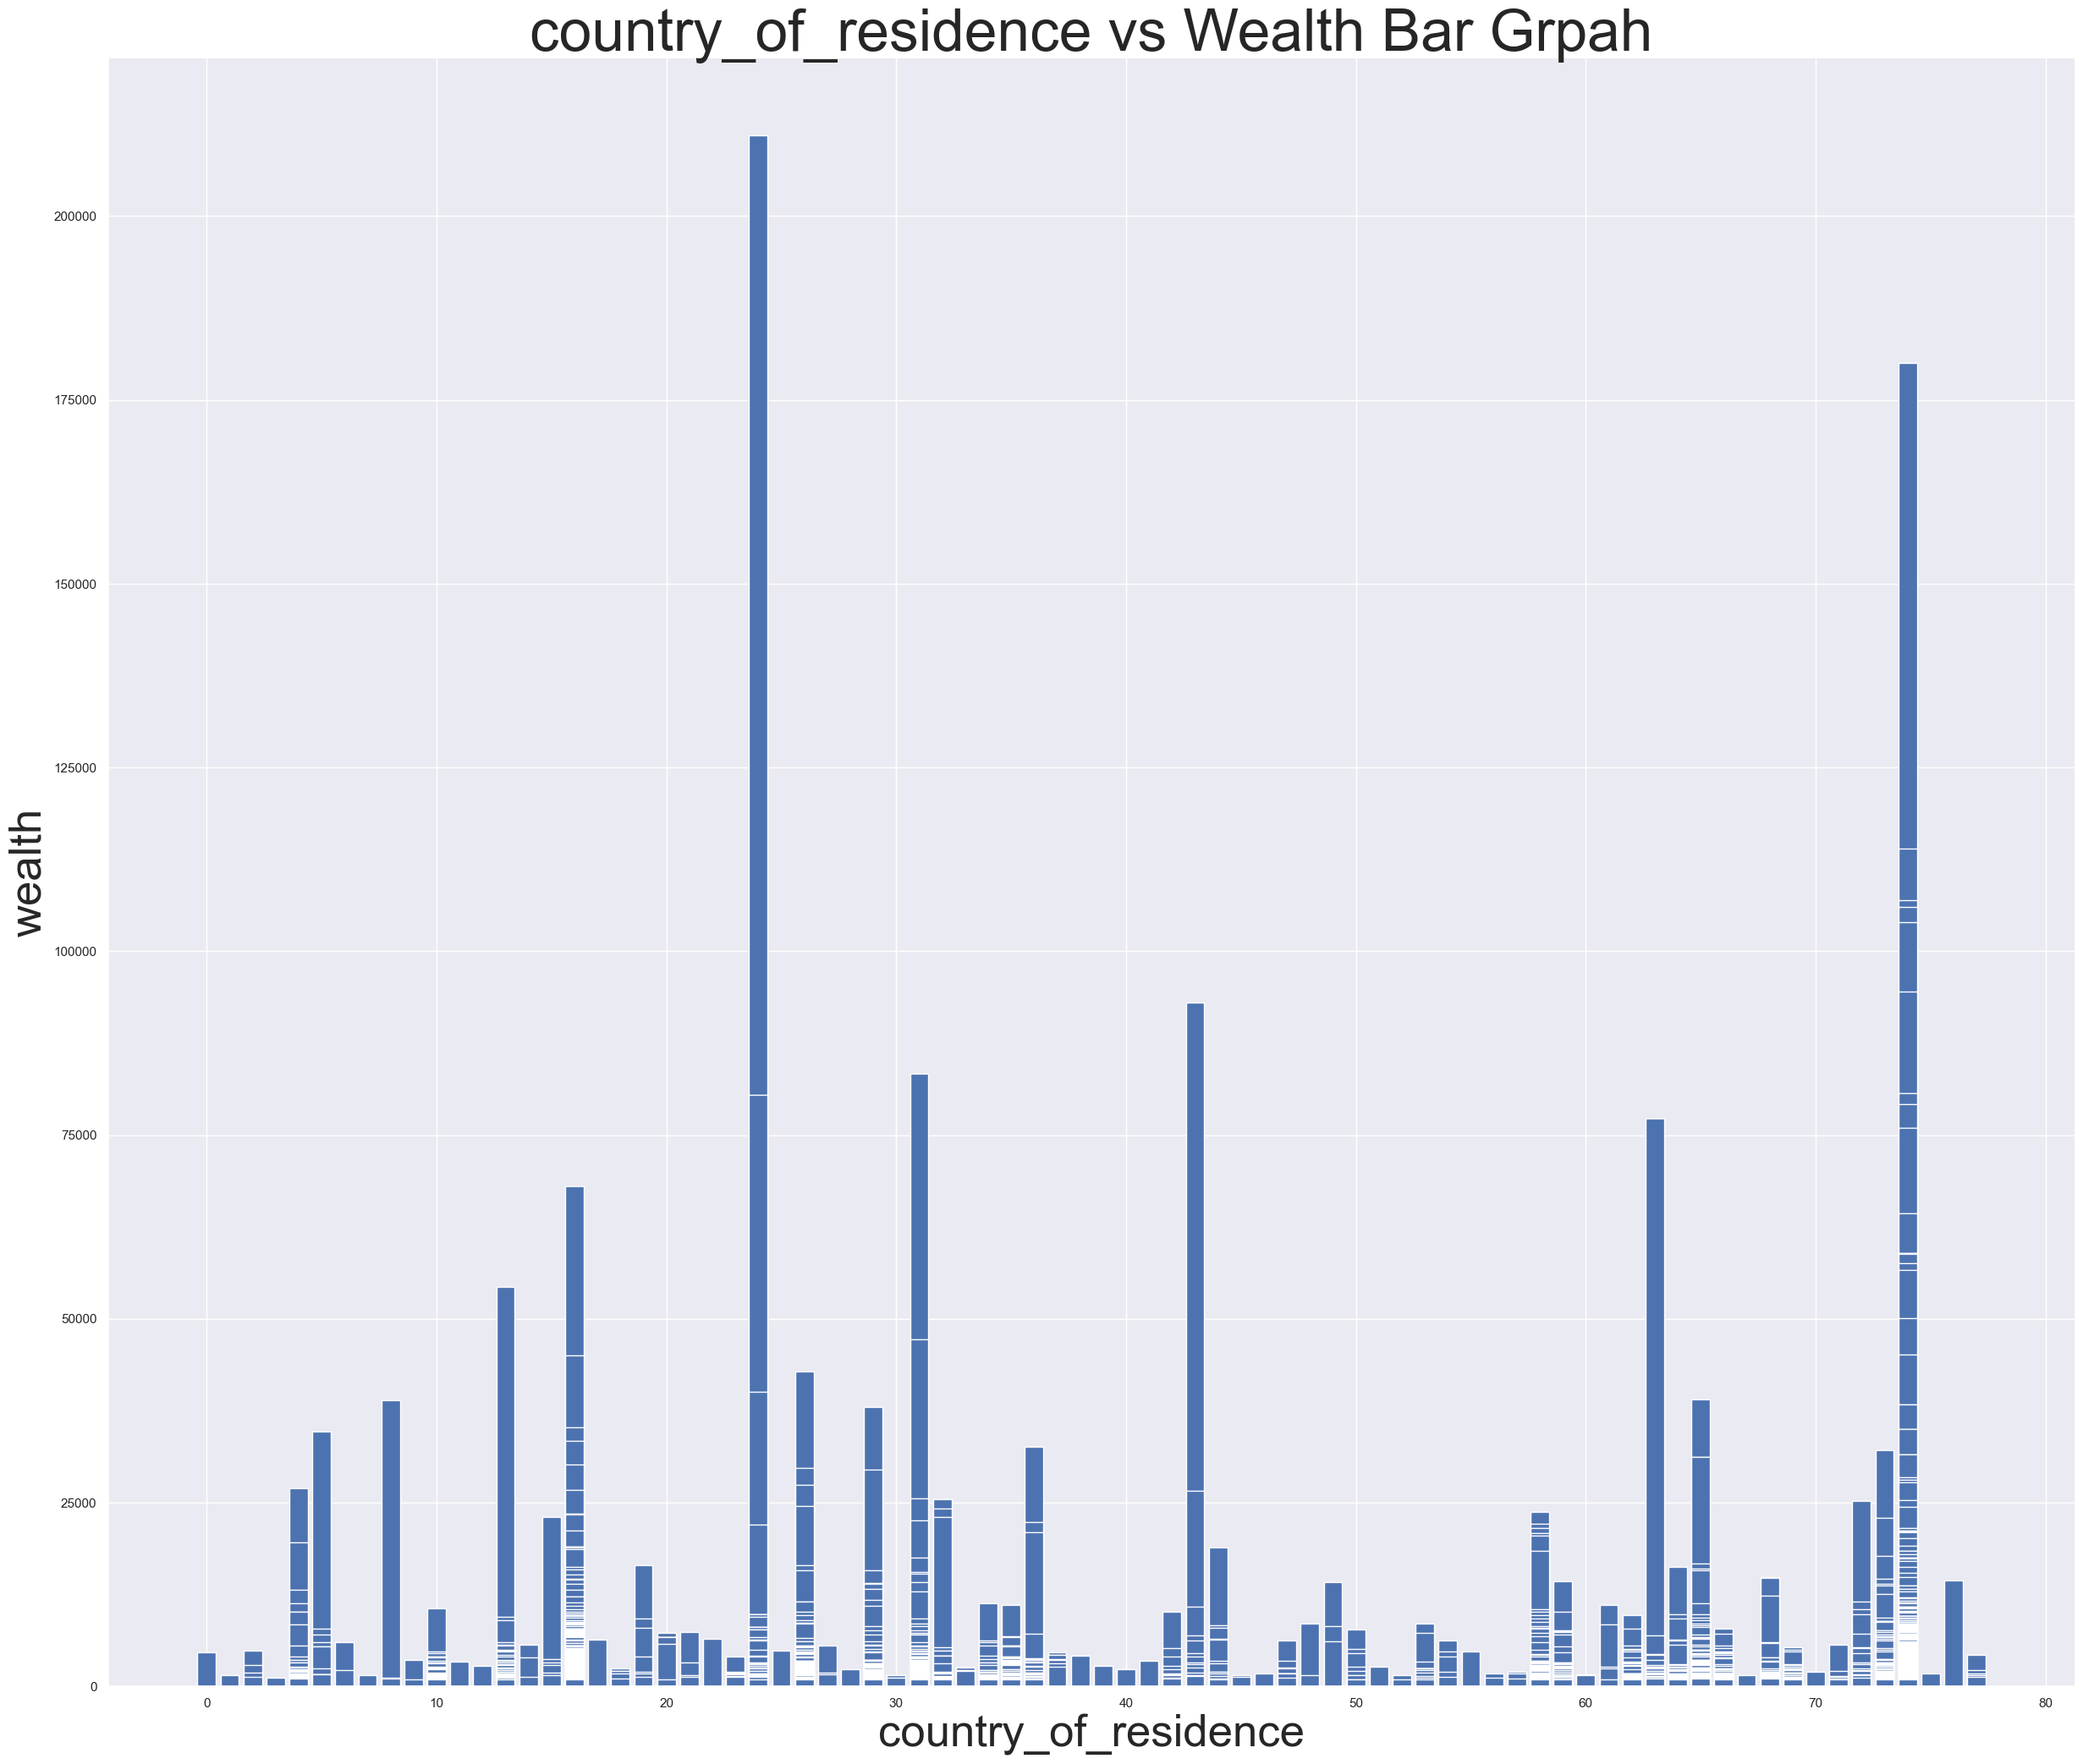

In [14]:
plt.figure(figsize=(30, 25))
plt.bar(billion['country_of_residence'],billion['wealth'])
plt.xlabel('country_of_residence',fontsize=38)
plt.ylabel('wealth',fontsize=38)
plt.title('country_of_residence vs Wealth Bar Grpah',fontsize=50)


In [15]:
billion.drop(['country_of_residence','city_of_residence','source'],axis=1,inplace=True)


In [16]:
billion1 = pd.get_dummies(billion, columns=['gender'])
billion.drop('gender',axis=1,inplace=True)


In [17]:
billion1['continent'] = label_encoder.fit_transform(billion1['continent'])

In [18]:
billion1.head()

,position,wealth,industry,age,citizenship,birth_date,last_name,first_name,residence_state,residence_region,...,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent,gender_F,gender_M
0,1.0,211000.0,4,74.0,France,1949-03-05,Arnault,Bernard,No subdivisions info,No subdivisions info,...,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,2,0,1
1,2.0,180000.0,0,51.0,United States,1971-06-28,Musk,Elon,Texas,South,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
2,3.0,114000.0,16,59.0,United States,1964-01-12,Bezos,Jeff,Washington,West,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
3,4.0,107000.0,16,78.0,United States,1944-08-17,Ellison,Larry,Hawaii,West,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
4,5.0,106000.0,5,92.0,United States,1930-08-30,Buffett,Warren,Nebraska,Midwest,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1


In [19]:
billion1.drop(['residence_state','citizenship','last_name'],axis=1,inplace=True)



In [20]:
billion1.drop(['first_name','birth_date'],axis=1,inplace=True)

In [21]:
billion1.head()

,position,wealth,industry,age,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,...,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent,gender_F,gender_M
0,1.0,211000.0,4,74.0,No subdivisions info,1949.0,3.0,5.0,110.05,1.1,...,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,2,0,1
1,2.0,180000.0,0,51.0,South,1971.0,6.0,28.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
2,3.0,114000.0,16,59.0,West,1964.0,1.0,12.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
3,4.0,107000.0,16,78.0,West,1944.0,8.0,17.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
4,5.0,106000.0,5,92.0,Midwest,1930.0,8.0,30.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1


In [22]:
billion1['residence_region'].value_counts()

No subdivisions info    1837
West                     248
South                    240
Northeast                190
Midwest                   67
Unknown                    8
U.S. Territories           1
Name: residence_region, dtype: int64

In [23]:
billion1['residence_region'] = label_encoder.fit_transform(billion1['residence_region'])

In [24]:
billion1.head()

,position,wealth,industry,age,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,...,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent,gender_F,gender_M
0,1.0,211000.0,4,74.0,1,1949.0,3.0,5.0,110.05,1.1,...,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,2,0,1
1,2.0,180000.0,0,51.0,3,1971.0,6.0,28.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
2,3.0,114000.0,16,59.0,6,1964.0,1.0,12.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
3,4.0,107000.0,16,78.0,6,1944.0,8.0,17.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1
4,5.0,106000.0,5,92.0,0,1930.0,8.0,30.0,117.24,7.5,...,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,3,0,1


In [25]:
billion1['cpi_country'].value_counts()

117.24         754
125.08         515
180.44         157
No CPI info    145
112.85         102
              ... 
115.09           1
151.36           1
133.61           1
140.95           1
129.18           1
Name: cpi_country, Length: 64, dtype: int64

In [26]:
billion1.replace({"No CPI info": np.nan}, regex=True, inplace = True)

In [27]:
billion1.isnull().sum()/len(billion1)*100

position                0.000000
wealth                  0.000000
industry                0.000000
age                     0.000000
residence_region        0.000000
birth_year              0.000000
birth_month             0.000000
birth_day               0.000000
cpi_country             5.596295
cpi_change_country      5.596295
gdp_country             0.000000
g_tertiary_ed_enroll    0.000000
g_primary_ed_enroll     0.000000
life_expectancy         0.000000
tax_revenue             0.000000
tax_rate                0.000000
country_pop             0.000000
country_lat             0.000000
country_long            0.000000
continent               0.000000
gender_F                0.000000
gender_M                0.000000
dtype: float64

In [28]:
billion2= billion1.dropna()


In [29]:
billion2.isnull().sum()/len(billion1)*100

position                0.0
wealth                  0.0
industry                0.0
age                     0.0
residence_region        0.0
birth_year              0.0
birth_month             0.0
birth_day               0.0
cpi_country             0.0
cpi_change_country      0.0
gdp_country             0.0
g_tertiary_ed_enroll    0.0
g_primary_ed_enroll     0.0
life_expectancy         0.0
tax_revenue             0.0
tax_rate                0.0
country_pop             0.0
country_lat             0.0
country_long            0.0
continent               0.0
gender_F                0.0
gender_M                0.0
dtype: float64

# splitting into x and y 

In [30]:
X = billion2.drop(columns=['wealth']) 
y = billion2['wealth']   

In [31]:
X.shape


(2446, 21)

In [32]:
y.shape

(2446,)

# Split into train and test

In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1956, 21)
Shape of X_test: (490, 21)
Shape of y_train: (1956,)
Shape of y_test: (490,)


# Model Building

In [37]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 21601350.79522501
R^2 Score: 0.2759360375202543


In [39]:
r2 = r2_score(y_test, y_pred)


In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 9994.804081632654
R^2 Score: 0.9996649803284915


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 14982.946034516124
R^2 Score: 0.9994977808851764


In [42]:
# Accuracy -a)  From GradientBoostingRegressor =99.9%
#            b)  From RandomForestRegressor     =99.9%

*Thanks